**Konkurs: Titanic - Machine Learning from Disaster**

Link do konkursu: https://www.kaggle.com/c/titanic

Konkurs polega na przeanalizowaniu danych osób, które były na pokładzie Titanica podczas katastrofy oraz zaprojektowaniu modelu, który będzie w stanie przewidzieć, które osoby przetrwały katastrofę. 

W konkursie podano pliki train i test w formacie csv, które zawierają dane osób na statku. Dane zawierają:

    - ID pasażera
    - informację, czy osoba przetrwała
    - numer klasy
    - tytuł, imię i nazwisko
    - płeć
    - wiek
    - informację o liczbie rodzeństwa/posiadaniu partnera poza statkiem
    - informację o liczbie dzieci/rodziców poza statkiem
    - numer biletu
    - opłatę za przejazd
    - numer kabiny
    - port zaokrętowania

Pobranie odpowiednich bibliotek

In [496]:
import numpy as np
import pandas as pd

#biblioteki do wyświetlania wykresów
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignorowanie warningów
import warnings
warnings.filterwarnings('ignore')

In [497]:
#odczyt z plików csv
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#podsumowanie danych z train.csv
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Marechal, Mr. Pierre",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Analiza danych**

Z powyższej tabeli widać, że u ponad 100 osob brakuje danych na temat wieku,
u trzech osób o porcie zaokrętowania i ponad 3/4 osób nie ma danych na temat kabiny. Informacje o wieku można przewidzieć na podstawie tytułu przy nazwisku.
Port zaokrętowania u większości to Southampton, więc można przypisać to tym trzem osobom. Z kolei trudno uzupełnić dane na temat kabiny, stąd można zamienić wartość numeru kabiny na informację prawda/fałsz.

Pewne logiczne przewidywania:
Większe szanse na przetrwanie będa miały dzieci, kobiety, osoby z rodziną na pokładzie oraz osoby o wyższej klasie społecznej.

**Wykresy na podstawie danych**

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


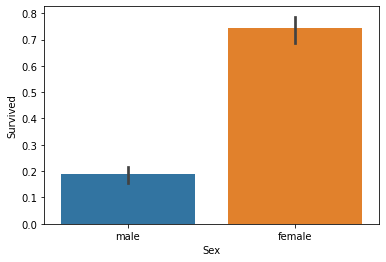

In [498]:
#rysowanie wykresu przetrwania kobiet i mężczyzn
sns.barplot(x="Sex", y="Survived", data=train)

#wyswietlenie danych o przeżyciu kobiet i mężczyzn
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


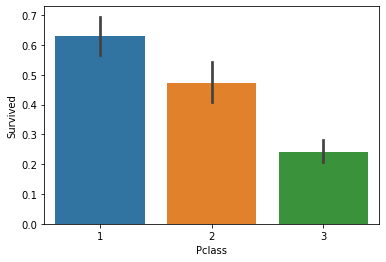

In [499]:
#rysowanie wykresu przetrwania po numerze klasy
sns.barplot(x="Pclass", y="Survived", data=train)

#wyswietlenie danych o przezyciu osób z różnych klas
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

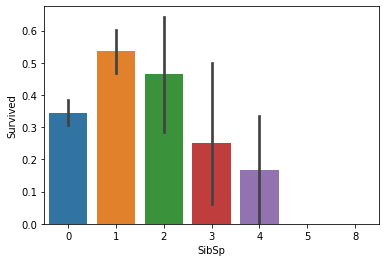

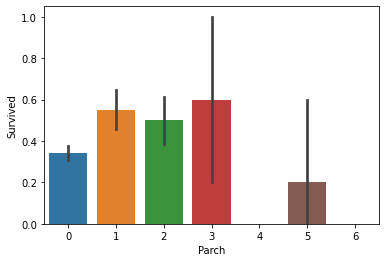

In [500]:
#rysowanie wykresu przetrwania osób, które miały partnerów/rodzeństwo poza pokładem
sns.barplot(x="SibSp", y="Survived", data=train)
plt.show()

#rysowanie wykresu przetrwania osób, które miały rodziców/dzieci poza pokładem
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

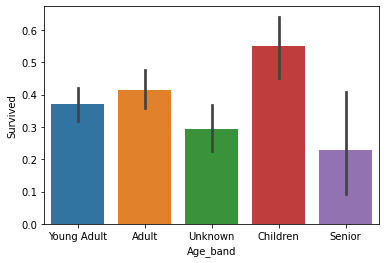

In [501]:
train['Age_band']="Unknown"
train.loc[train['Age']<=16,'Age_band']="Children"
train.loc[(train['Age']>16)&(train['Age']<=32),'Age_band']="Young Adult"
train.loc[(train['Age']>32)&(train['Age']<=60),'Age_band']="Adult"
train.loc[train['Age']>60,'Age_band']="Senior"

#draw a bar plot of Age vs. survival
sns.barplot(x="Age_band", y="Survived", data=train)
plt.show()
train = train.drop(['Age_band'], axis = 1)

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


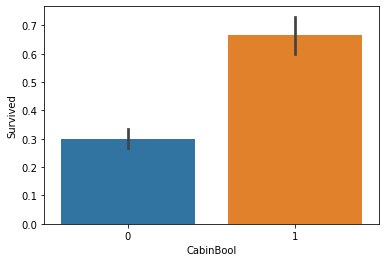

In [502]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#Pokazaniu udziału procentów osób, które miały nr kabiny oraz wyswietlenie wykresu
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

Z powyższych danych potwierdza się, że większe szanse na przetrwanie mają kobiety, dzieci,
osoby z rodziną na pokładzie oraz osoby z wyższej klasy społecznej

Czyszczenie oraz uzupełnianie danych

In [503]:
#usuwanie niepotrzebnych informacji
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [504]:
#numer biletu nie jest potrzebny do analizy
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


In [505]:
#uzupełnianie brakujących informacji o porcie zaokrętowania
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)
train = train.fillna({"Embarked": "S"}) # gdyż S występowało najwięcej w dotychczasowych danych

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [506]:
#przewidywanie brakujących danych o wieku
#złaczenie tabel train i test
combine = [train, test]

#wyciągnięcie tytułu z kolumny Name
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [507]:
#zastąpienie tytułów nazwami bardziej związanymi z wiekiem
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [508]:
#zmapowanie tytułu na zmienne numeryczne
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [509]:
#zmiana NaN na 0 w kolumnnie Age
for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(0)

In [510]:
#mapowanie wieku na nazwę związaną z wiekiem oraz z tytułu na nazwę związaną z wiekiem
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

index = train.index
number_of_rows = len(index)
length = range(number_of_rows)

for x in length:
    try:
        if train["Age"][x] == 0:
            train["Age"][x] = age_title_mapping[train["Title"][x]]
        elif float(train["Age"][x]) > 0 and float(train["Age"][x]) < 10:
            train["Age"][x] = "Baby"
        elif float(train["Age"][x]) >= 10 and float(train["Age"][x]) < 18:
            train["Age"][x] = "Student"
        elif float(train["Age"][x]) >= 18 and float(train["Age"][x]) < 25:
            train["Age"][x] = "Young Adult"
        elif float(train["Age"][x]) >= 25 and float(train["Age"][x]) < 50:
            train["Age"][x] = "Adult"
        elif float(train["Age"][x]) >= 50:
            train["Age"][x] = "Senior"
    except ValueError as verr:
        pass

index = test.index
number_of_rows = len(index)
length = range(number_of_rows)
for x in length:
    try:
        if test["Age"][x] == 0:
            test["Age"][x] = age_title_mapping[test["Title"][x]]
        elif float(test["Age"][x]) > 0 and float(test["Age"][x]) < 10:
            test["Age"][x] = "Baby"
        elif float(test["Age"][x]) >= 10 and float(test["Age"][x]) < 18:
            test["Age"][x] = "Student"
        elif float(test["Age"][x]) >= 18 and float(test["Age"][x]) < 25:
            test["Age"][x] = "Young Adult"
        elif float(test["Age"][x]) >= 25 and float(test["Age"][x]) < 50:
            test["Age"][x] = "Adult"
        elif float(test["Age"][x]) >= 50:
            test["Age"][x] = "Senior"
    except ValueError as verr:
        pass

In [511]:
#mapowanie z nazwy na zmienną numeryczną
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['Age'].map(age_mapping)
test['AgeGroup'] = test['Age'].map(age_mapping)

train.head()

#usuwanie kolumny Age
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [512]:
#mapowanie z nazwy na zmienną numeryczną
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,7.2500,S,0,1,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,71.2833,C,1,3,6
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,7.9250,S,0,2,6
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,53.1000,S,1,3,6
4,5,0,3,"Allen, Mr. William Henry",0,0,0,8.0500,S,0,1,6


In [513]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,7.2500,1,0,1,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,71.2833,2,1,3,6
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,7.9250,1,0,2,6
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,53.1000,1,1,3,6
4,5,0,3,"Allen, Mr. William Henry",0,0,0,8.0500,1,0,1,6


In [514]:
# usunięcie nazwy osoby
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [515]:
#uzupełnienie kolumny Fare w zależności od klasy
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#zmapowanie na zmienna numeryczna
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#usuniecie kolumny Fare
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

**Badanie efektu działanie różnych modeli**

Tutaj będa badane modele:
    - Gaussian Naive Bayes
    - Logistic Regression
    - Support Vector Machines
    - Perceptron
    - Decision Tree Classifier
    - Random Forest Classifier
    - KNN or k-Nearest Neighbors
    - Stochastic Gradient Descent
    - Gradient Boosting Classifier

In [516]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [517]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.17


In [518]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

80.71


In [519]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

83.25


In [520]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

77.16


In [521]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

78.68


In [522]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

83.25


In [523]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

85.79


In [524]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

82.74


In [525]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

77.66


In [526]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.26


Porównanie modeli

In [527]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.79
9,Gradient Boosting Classifier,84.26
0,Support Vector Machines,83.25
7,Decision Tree,83.25
1,KNN,82.74
2,Logistic Regression,80.71
5,Perceptron,78.68
4,Naive Bayes,78.17
8,Stochastic Gradient Descent,77.66
6,Linear SVC,77.16


In [528]:
#umieszczenie danych w submission.csv
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)